# Diversificazione del portafoglio

Costruire un portafoglio ben diversificato ed effiente è un misto di arte e scienza.
Il nostro obiettivo è quello di diversificare i rischi non ricompensati.

Il rischio ricompensato va bene ed è l'unico modo per generare rendimenti al di sopra del risk free rate.

Ora per superare questa sfida dobbiamo includere nel nostro portafoglio assett che si comportino in modo diverso, sopratutto durante le crisi di mercato.

La forma più semplice di diversificazione è l'uso della correlazione. Una tecnica interessante può essere l'utilizzo di metodi di unsupervised learning per analizzare le relazioni tra le varie componenti.

## Analisi delle componenti pricipali

Una idea interessante per estrarre dei fattori è utlizzare la tecnica PCA per estrarre un sottoinsieme di componenti principali (che possiamo vedere come fattori).

L'idea è quella di partire dalla matrice di covarianza, e ottenere:

* Una matrice D di autovalori
* Un insieme di autovettori P

Fatto questo ordiniamo la matrice D in ordine decresente dei suoi autovalori in modo che l'autovalore più grande sarà il più importante man mano che i valori scendono le componenti sono sempre meno importanti (Meno Varianza).

## Il ruolo dei cluster 

Nella diversificazione del portafolgio il clustering gioca un ruolo importante, si tratta di un problema di ottimizzazione.

Qui la sua definizione
$$
\begin{equation}
    \begin{gathered}
        z=\underset{x>0}{\Delta} \underset{J}{\operatorname{minimize}} \sum_I \sum_J d_{i j} x_{i j} \\
        \sum_J x_{i j}=1 \quad \text { all } i, \\
        \sum_J x_{i j}=m \\
        x_{i j} \leqslant x_{i j} \quad \text { all } i, j, \\
        x_{i j}=\{0,1\} \quad \text { all } i, j
    \end{gathered}
\end{equation}
$$

* $d_{i j}$ rappresenta la distanza tra il punto i e j
* $x_{i j}$ è una variabile booleana che rappresenta dice se l'oggetto i è assegnato al cluster in cui j è mediano
* $x_{i j}=1$ indica l'insieme in cui gli elementi i hanno elemento mediano j
* m è il numero desiderato di cluster

L'idea comunque è quella di creare gruppi omogenei (con le stesse caratteristiche)


## Analisi Grafica

Introduciamo un ulteriore metodo di analisi, l'analisi tramite reti grafiche.
Questo tipo di analisi deriva dai social network e ci permette di analizzare le dipendenze tra i vari titoli, con questo tipo di analisi abbiamo facilità di interpretazione dei dati.

Come funzionano principalmente queste reti ?

Facciamo un esempio, mostrando una rete

![network](./img/network.png)

Possiamo immaginare i vari nodi come le azioni che vogliamo analizzare e gli archi tra i vari nodi come la relazione che intercorre tra di essi.
Quello che a noi interessa per la diversificazione del portafoglio è l'indipendenza condizionale.

come funziona qesta cosa? 

Facciamo un ulteriore esempio

![indipendence](./img/indipendence.png)

Possiamo dire dalla immagine sopra che i tassi di interesse sono collegati con le obbligazioni statali e al mercato azionario ma che questi due sono indipendenti, come si vede non esiste un arco che collega i due nodi, questo è quello che chiamiamo indipendenza condizionata.

Per analizzare questa indipendenza utilizzeremo la **matrice di precisione** che indica che se due azioni i e j sono indipendenti allora alla posizione i,j della matrice avremo valore 0

Mediante l'utilizzo di metodi con penalità possiamo partire con una bassa penalità e aumentarla fino ad ottenere le componenti più disconnesse che ci interessano.

Iniziamo ora con la parte tecnica ovvero analizziamo le dipendenze delle componenti del ftse mib

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from utils import get_summary_statistics,get_annualised_sharpe

In [2]:
ftse_df = pd.read_csv('./data/ftse_return.csv',index_col=0,parse_dates=True)
#elimino tutte le righe in cui l'indice non è valorizzato
ftse_df = ftse_df[ftse_df['FTSEMIB'].notna()]

Per ogni titolo dell'indice andiamo ad analizzare le statistiche di base

In [3]:
df_stat = get_summary_statistics(ftse_df,remove_nan=False)
df_stat.sort_values(by='Annu. Sharpe Ratio', ascending=False)

Summary Statistic Information from 04/01/2000 to 30/12/2024:


,First Valid Date,Total Return(%),Average Return(%),Geometric Mean(%),Annu. Ave Return(%),Annu. Std(%),Annu. Sharpe Ratio,Max Drawdown(%)
RACE,05/01/2016,831.23,0.11,9.33,33.31,27.84,1.20,-37.22
BC,30/04/2012,805.47,0.09,9.21,25.36,32.04,0.79,-49.41
REC,04/01/2000,4799.12,0.08,16.83,21.78,28.68,0.76,-62.10
FBK,03/07/2014,313.64,0.07,5.84,20.49,31.80,0.64,-44.96
DIA,20/07/2007,708.77,0.07,8.72,18.09,30.27,0.60,-60.84
AMP,02/10/2001,1487.33,0.07,11.69,19.59,34.63,0.57,-92.14
INW,23/06/2015,145.42,0.05,3.65,13.29,24.62,0.54,-29.44
MONC,17/12/2013,235.06,0.06,4.95,17.72,32.63,0.54,-46.56
TEN,18/12/2002,858.38,0.07,9.46,18.82,37.31,0.50,-84.42
IP,04/01/2000,891.58,0.05,9.60,14.62,29.92,0.49,-77.33


In [4]:
mindate = ftse_df.index.min()
maxdate = ftse_df.index.max()

In [5]:
import ipywidgets as widgets
from IPython.display import display

w_start = widgets.DatePicker(
    description='Start Date',
    value = mindate
)

display(w_start)

DatePicker(value=Timestamp('2000-01-04 00:00:00'), description='Start Date', step=1)

In [6]:
end_date = maxdate


w_end = widgets.DatePicker(
    description='End Date',
    value = end_date
)

display(w_end)

DatePicker(value=Timestamp('2024-12-30 00:00:00'), description='End Date', step=1)

In [17]:
start_date = pd.to_datetime(w_start.value)
end_date = pd.to_datetime(w_end.value)
print('Results over the time period ', start_date, ' to ', end_date, ':')

Results over the time period  2000-01-04 00:00:00  to  2008-01-01 00:00:00 :


In [18]:
ind = (ftse_df.index >= start_date) & (ftse_df.index <= end_date)
X = ftse_df[ind]

if(X.isnull().values.any()):
        print('WARNING: Some firms have missing data during this time period!')
        print('Dropping firms: ')
        for Xcol_dropped in list(X.columns[X.isna().any()]): print(Xcol_dropped)
        X = X.dropna(axis='columns')
        print()
        
start = X.index[0].strftime("%m/%d/%Y")
end = X.index[-1].strftime("%m/%d/%Y")

print('Number of firms examined:', X.shape[1])

Dropping firms: 
RACE
TEN
PRY
PST
LDO
MONC
TRN
SRG
FBK
INW
BC
CPR
NEXI
AMP
PIRC
DIA
HER
IG
AZM
IVG

Number of firms examined: 21


Eseguiamo ora l'analisi per estrarre i vari cluster delle nostre azioni partiamo con l'analisi [GraphicalLassoCV](https://scikit-learn.org/stable/auto_examples/applications/plot_stock_market.html) 

In [31]:
from sklearn import cluster, covariance, manifold 
alphas = np.logspace(-1.5, 1, num=30)
edge_model = covariance.GraphicalLassoCV(alphas=alphas)

In [32]:
X_std = X / X.std(axis=0)
edge_model.fit(X_std)

GraphicalLassoCV(alphas=array([ 0.03162278,  0.0385662 ,  0.0470342 ,  0.05736153,  0.06995642,
        0.08531679,  0.10404983,  0.1268961 ,  0.15475874,  0.18873918,
        0.23018073,  0.28072162,  0.3423598 ,  0.41753189,  0.50920956,
        0.62101694,  0.75737392,  0.92367086,  1.12648169,  1.3738238 ,
        1.67547492,  2.04335972,  2.49202115,  3.03919538,  3.70651291,
        4.52035366,  5.51288979,  6.72335754,  8.19960824, 10.        ]))

In [33]:
names = np.array(list(X.columns))
_, labels = cluster.affinity_propagation(edge_model.covariance_)
n_labels = labels.max()
    
for i in range(n_labels + 1):
    print('Cluster %i: %s' % ((i + 1), ', '.join(names[labels == i])))

Cluster 1: REC
Cluster 2: BPE
Cluster 3: BPSO
Cluster 4: ISP, ENEL, UCG, G, ENI, STLAM, STMMI, MB, BAMI, BMED, UNI, BMPS, BZU, A2A, IP, SPM, TIT, FTSEMIB


In [34]:
node_position_model = manifold.MDS(n_components=2, random_state=0)
embedding = node_position_model.fit_transform(X_std.T).T

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [35]:
import matplotlib.pylab as pl

color_list = pl.cm.jet(np.linspace(0,1,n_labels+1))
my_colors = [color_list[i] for i in labels]

In [36]:
# Compute the partial correlations
partial_correlations = edge_model.precision_.copy()
d = 1 / np.sqrt(np.diag(partial_correlations))
partial_correlations *= d
partial_correlations *= d[:, np.newaxis]
non_zero = (np.abs(np.triu(partial_correlations, k=1)) > 0.02)

# Compute the edge values based on the partial correlations
values = np.abs(partial_correlations[non_zero])
val_max = values.max()

In [37]:
title = 'Graphical Network Analysis of Selected Firms over the Period '+start+' to '+end+' '

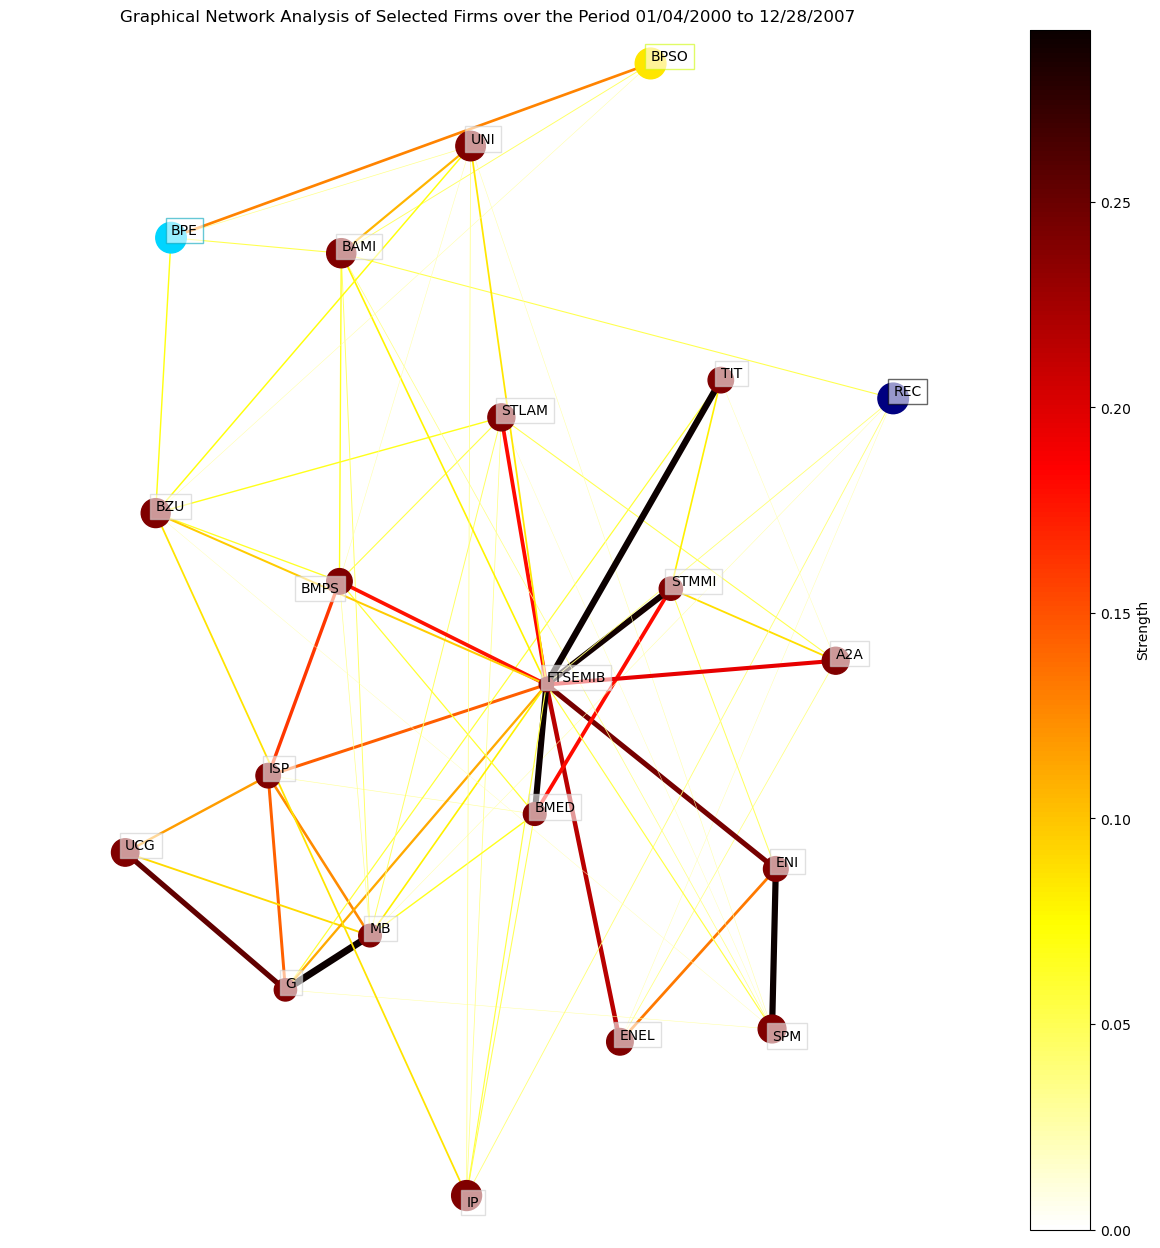

In [38]:
from utils import plot_graphical_analysis
plot_graphical_analysis(d, partial_correlations, my_colors,names, labels, embedding, val_max, title)